Discretization, or binning, is the process of transforming continuous variables into discrete
variables by creating a set of contiguous intervals, also called bins, that span the range of
the variable values.

_Discretization helps in changing the distribution of some skewed variables by creating some intervals in such a way that the `outliers` fall with the `inliers` and the distribution looks less skewed_

- Dividing the variable into intervals of equal width
- Sorting the variable values in intervals of equal frequency
- Performing discretization followed by categorical encoding
- Allocating the variable values in arbitrary intervals
- Performing discretization with k-means clustering
- Using decision trees for discretization

## Dividing the variable into intervals of equal width

In equal-width discretization, the values of the variables are sorted in ranges of equal width

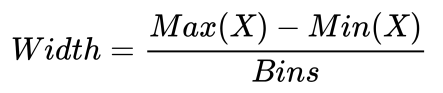

> For Example: We've the data as follows.
- Data: `10,11,13,16,19,22,25,29,33,36,39,44,45,46,46,49,52,57,59,66,88,90` & suppose we want to create `8 bins`.
- Width = `90-10/8`
- Width = 10
- Intervals: `10-20, 20-30, 30-40, 40-50, 50-60, 60-70, 70-80, 80-90`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from feature_engine.discretisation import EqualWidthDiscretiser

In [2]:
boston = load_boston()

In [3]:
data_boston = pd.DataFrame(boston.data, columns=boston.feature_names)

In [6]:
data_boston['MEDV'] = boston.target

In [7]:
data_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
# Let's create the training & test sets
x_train, x_test, y_train, y_test = train_test_split(data_boston.drop(labels='MEDV', axis=1), data_boston['MEDV'], 
                                                    test_size=0.3, random_state=0)

In [13]:
# Let's discretize the LSTAT variable, for that we need its range and no of bins we want to create. Let it be 10
lstat_range = x_train['LSTAT'].max() - x_train['LSTAT'].min()
lstat_range

35.25

In [15]:
lstat_width = int(lstat_range/10)
lstat_width

3

In [16]:
# We now have the width, let's find the rounded minimum & maximum for LSTAT from x_train

In [17]:
min_val = int(np.floor(x_train['LSTAT'].min()))
max_val = int(np.ceil(x_train['LSTAT'].max()))
# We're rounding up & down the max & min respectively so that no values gets left

In [18]:
min_val, max_val, lstat_width

(1, 37, 3)

In [19]:
# Now let's define a list based on which the intervals will get created
intervals = [i for i in range(min_val, max_val+lstat_width, lstat_width)]
intervals

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37]

In [20]:
# We can now create the bins/intevals based on pandas cut() method

In [33]:
x_train['lstat_bins'] = pd.cut(x=x_train['LSTAT'], bins=intervals, include_lowest=True)

In [34]:
x_train[['LSTAT', 'lstat_bins']]

,LSTAT,lstat_bins
141,34.41,"(34.0, 37.0]"
272,7.73,"(7.0, 10.0]"
135,16.96,"(16.0, 19.0]"
298,4.97,"(4.0, 7.0]"
122,17.93,"(16.0, 19.0]"
...,...,...
323,11.74,"(10.0, 13.0]"
192,2.87,"(0.999, 4.0]"
117,10.30,"(10.0, 13.0]"
47,18.80,"(16.0, 19.0]"


In [44]:
x_train.groupby('lstat_bins')['LSTAT'].count()

lstat_bins
(0.999, 4.0]    28
(4.0, 7.0]      67
(7.0, 10.0]     63
(10.0, 13.0]    49
(13.0, 16.0]    44
(16.0, 19.0]    45
(19.0, 22.0]    21
(22.0, 25.0]    17
(25.0, 28.0]     7
(28.0, 31.0]     9
(31.0, 34.0]     0
(34.0, 37.0]     4
Name: LSTAT, dtype: int64

In [41]:
# Discretizing x_test
x_test['lstat_bins'] = pd.cut(x=x_test['LSTAT'], bins=intervals, include_lowest=True)

In [42]:
x_test[['LSTAT', 'lstat_bins']]

,LSTAT,lstat_bins
329,7.34,"(7.0, 10.0]"
371,9.53,"(7.0, 10.0]"
219,10.50,"(10.0, 13.0]"
403,19.77,"(19.0, 22.0]"
78,12.34,"(10.0, 13.0]"
...,...,...
4,5.33,"(4.0, 7.0]"
428,21.52,"(19.0, 22.0]"
385,30.81,"(28.0, 31.0]"
308,4.54,"(4.0, 7.0]"


In [50]:
# Let's check the percentage of values in different bins of training & test set in LSTAT variable
t1 = x_train.groupby('lstat_bins')['LSTAT'].count() / len(x_train)
t2 = x_test.groupby('lstat_bins')['LSTAT'].count() / len(x_test)

Text(0, 0.5, 'Percentage of Values in Various Bins')

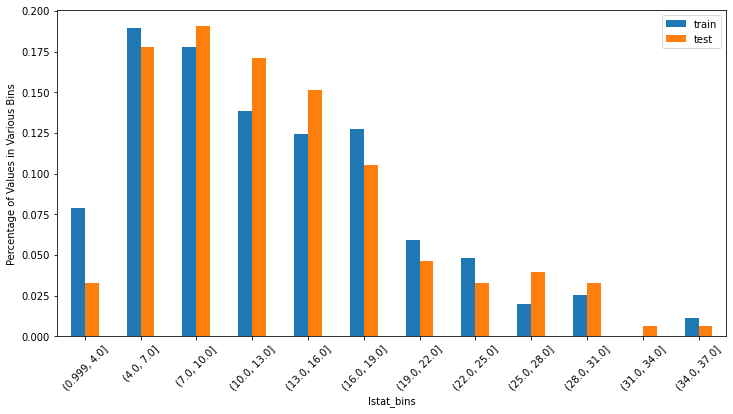

In [60]:
# Let's draw a barplot for this
temp = pd.concat([t1, t2], axis=1, ignore_index=True)
temp.columns = ['train', 'test']

temp.plot.bar(figsize=(12,6))
plt.xticks(rotation=45)
plt.ylabel('Percentage of Values in Various Bins')

#### We can save ourselves from this agony by using feature_engine's EqualWidthDiscretiser

In [61]:
# The advantage of using EqualWidthDiscretiser is that we can bin many variables simultaneously

In [62]:
# Let's create an equal-width discretizer to sort 3 continuous variables into 10 intervals

In [70]:
x_train, x_test, y_train, y_test = train_test_split(data_boston.drop(labels='MEDV', axis=1), data_boston['MEDV'], 
                                                    test_size=0.3, random_state=0)

In [71]:
discritiser = EqualWidthDiscretiser(variables=['LSTAT', 'DIS', 'RM'], bins=10)

In [72]:
discritiser.fit(x_train)

EqualWidthDiscretiser(variables=['LSTAT', 'DIS', 'RM'])

In [73]:
# Inspecting the limits of the intervals
discritiser.binner_dict_      # The ranges have been extended to -inf & inf

{'LSTAT': [-inf,
  5.255,
  8.78,
  12.305,
  15.83,
  19.355,
  22.88,
  26.405,
  29.93,
  33.455,
  inf],
 'DIS': [-inf,
  2.26943,
  3.36466,
  4.459890000000001,
  5.5551200000000005,
  6.65035,
  7.745580000000001,
  8.840810000000001,
  9.936040000000002,
  11.031270000000003,
  inf],
 'RM': [-inf,
  4.0828999999999995,
  4.6048,
  5.1267,
  5.6486,
  6.1705,
  6.692399999999999,
  7.2143,
  7.736199999999999,
  8.258099999999999,
  inf]}

In [74]:
x_train_disc = discritiser.transform(x_train)
x_test_disc = discritiser.transform(x_test)

**_EqualWidthDiscretiser() returns a digit indicating whether the value
was sorted in the first, second, or tenth bin. If we want to return the bins
as an object, we need to indicate return_object=True when we set up
the discretizer_**

In [75]:
x_train_disc   # Change in the values of DIS, RM, LSTAT

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,2,100.0,0,4.0,437.0,21.2,396.90,9
272,0.11460,20.0,6.96,0.0,0.464,5,58.7,2,3.0,223.0,18.6,394.96,1
135,0.55778,0.0,21.89,0.0,0.624,5,98.2,0,4.0,437.0,21.2,394.67,4
298,0.06466,70.0,2.24,0.0,0.400,5,20.1,6,5.0,358.0,14.8,368.24,0
122,0.09299,0.0,25.65,0.0,0.581,4,92.9,0,2.0,188.0,19.1,378.09,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,4,74.3,3,5.0,287.0,19.6,391.13,2
192,0.08664,45.0,3.44,0.0,0.437,6,26.3,4,5.0,398.0,15.2,390.49,0
117,0.15098,0.0,10.01,0.0,0.547,4,82.6,1,6.0,432.0,17.8,394.51,2
47,0.22927,0.0,6.91,0.0,0.448,4,85.5,4,3.0,233.0,17.9,392.74,4


## Sorting the variable values in intervals of equal frequency


In [1]:
# Previously the intervals were of equal width and number of observations varied (EqualWidthDiscritiser)
# Now the intervals are of variable width but number/freq of observations will remain same (EqualFrequencyDiscritiser)

_The interval width is determined by quantiles, and
therefore different intervals may have different widths. This discretization technique is particularly useful for
skewed variables as it spreads the observations over the different bins equally._

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [3]:
boston = load_boston()

In [8]:
data_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
data_boston['MEDV'] = boston.target

In [9]:
data_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
x_train, x_test, y_train, y_test = train_test_split(data_boston.drop(labels='MEDV', axis=1),
                                                    data_boston['MEDV'], test_size=0.3, random_state=0)

In [34]:
eq_freq_disc = EqualFrequencyDiscretiser(variables=['LSTAT', 'DIS', 'RM'], q=10)

In [35]:
eq_freq_disc.fit(x_train)

EqualFrequencyDiscretiser(variables=['LSTAT', 'DIS', 'RM'])

In [36]:
eq_freq_disc.binner_dict_     # The intervals created by EqualFrequencyDiscritiser for LSTAT, RM, DIS

{'LSTAT': [-inf,
  4.623,
  6.202,
  7.5280000000000005,
  9.5,
  11.16,
  13.260000000000002,
  15.565000000000005,
  18.06,
  22.452999999999996,
  inf],
 'DIS': [-inf,
  1.66132,
  1.9793,
  2.26121,
  2.6477400000000006,
  3.2157,
  3.7965,
  4.45352,
  5.40702,
  6.8147,
  inf],
 'RM': [-inf,
  5.5783000000000005,
  5.8532,
  5.9628000000000005,
  6.1048,
  6.2155000000000005,
  6.3946,
  6.5632,
  6.794,
  7.185,
  inf]}

In [37]:
x_train_disc = eq_freq_disc.transform(x_train) 
x_test_disc = eq_freq_disc.transform(x_test)

In [41]:
x_train_disc

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,0,100.0,0,4.0,437.0,21.2,396.90,9
272,0.11460,20.0,6.96,0.0,0.464,6,58.7,6,3.0,223.0,18.6,394.96,3
135,0.55778,0.0,21.89,0.0,0.624,5,98.2,2,4.0,437.0,21.2,394.67,7
298,0.06466,70.0,2.24,0.0,0.400,5,20.1,9,5.0,358.0,14.8,368.24,1
122,0.09299,0.0,25.65,0.0,0.581,2,92.9,2,2.0,188.0,19.1,378.09,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,1,74.3,7,5.0,287.0,19.6,391.13,5
192,0.08664,45.0,3.44,0.0,0.437,8,26.3,8,5.0,398.0,15.2,390.49,0
117,0.15098,0.0,10.01,0.0,0.547,3,82.6,4,6.0,432.0,17.8,394.51,4
47,0.22927,0.0,6.91,0.0,0.448,3,85.5,8,3.0,233.0,17.9,392.74,8


In [39]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80
